### Read saliency map and original image and convert to corresponding same format

In [61]:
# read original image in .nii.gz
import nibabel as nib
import numpy as np
import os
import itk
import matplotlib.pyplot as plt
from monai.config import print_config
from monai.transforms import (
    EnsureChannelFirst,
    Compose,
    LoadImage,  # Adjusted from LoadImaged for direct image loading
    Rotate90,
    Flip,
    NormalizeIntensity,
    ThresholdIntensity,
    SpatialPad,
    Resize,
    Transpose,
)
image_shape = 301
depth = 40
val_transforms = Compose([
    LoadImage(image_only=True, ensure_channel_first=True, reader="ITKReader"),
    Rotate90(k=3),
    Flip(spatial_axis=1),
    NormalizeIntensity(subtrahend=15, divisor=85),
    ThresholdIntensity(threshold=0, above=True, cval=0.0),
    ThresholdIntensity(threshold=1, above=False, cval=0.0),
    SpatialPad(spatial_size=[-1, -1, depth], mode='constant', method="symmetric"),
    Resize(spatial_size=[image_shape, image_shape, depth]),
    # Transpose(indices=[0, 3, 1, 2])  # Adjust based on actual shape after previous transforms
])
# choose patientID to review
patientID = 92
label_name="POOR_PROGNOSIS"
map_type = "Guided-Grad-Cam"
dir_saliency_map="/home/ubuntu/tenerife/data/ICH_results/3DClassificationImageModelMonai/Saliency_maps/MedCam/Fold0/GuidedGradCAM_features.transition3.conv"
saliency_map_path=os.path.join(dir_saliency_map, f"{patientID}_{map_type}-label-{label_name}.nii.gz")
saliency_map_nii = nib.load(saliency_map_path)
print("Shape saliency map:", saliency_map_nii.shape)
dir_original_file=os.path.join("/home/ubuntu/tenerife/data/ICH_nii_StrippedSkull/", label_name)
original_file_path=os.path.join(dir_original_file, f'{patientID}_brain.nii.gz')
original_image_nii = itk.imread(original_file_path)
original_image = itk.GetArrayFromImage(original_image_nii)
print("Shape original image:", original_image_nii.shape)


# Convert NIfTI to numpy arrays
saliency_map = saliency_map_nii.get_fdata()
processed_image = val_transforms(original_file_path)
# squeeze processed image to 3D
processed_image = np.squeeze(processed_image)
print("Shape processed image:", processed_image.shape)

Shape saliency map: (301, 301, 40)
Shape original image: (28, 512, 512)
Shape processed image: (301, 301, 40)


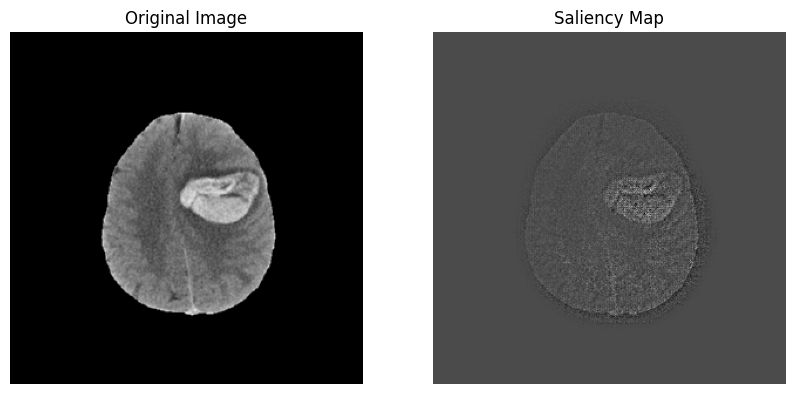

In [65]:
slice_index=24
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# If resizing is not used, replace 'saliency_map_resized' with 'saliency_map' in the next line
axes[0].imshow(processed_image[:, :, slice_index], cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(saliency_map[:, :, slice_index], cmap='gray')  # Use 'saliency_map_resized' if resized
axes[1].set_title('Saliency Map')
for ax in axes:
    ax.axis('off')
plt.show()

(-0.5, 300.5, 300.5, -0.5)

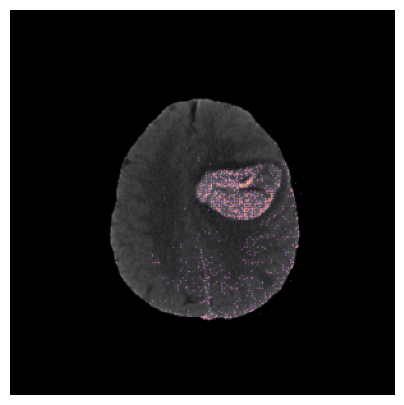

In [72]:
slice_index=24
# normalize saliency_map
saliency_map_normalized = (saliency_map - np.min(saliency_map)) / (np.max(saliency_map) - np.min(saliency_map))
# convert background of saliency_map to 0
saliency_map_normalized[saliency_map_normalized < 0.45] = 0
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(processed_image[:, :, slice_index], cmap='gray')
ax.imshow(saliency_map_normalized[:, :, slice_index], cmap='inferno', alpha=0.5)
ax.axis('off')


(array([1.900000e+01, 1.030000e+03, 9.544900e+04, 3.509474e+06,
        1.675500e+04, 1.164000e+03, 1.290000e+02, 1.800000e+01,
        1.000000e+00, 1.000000e+00]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

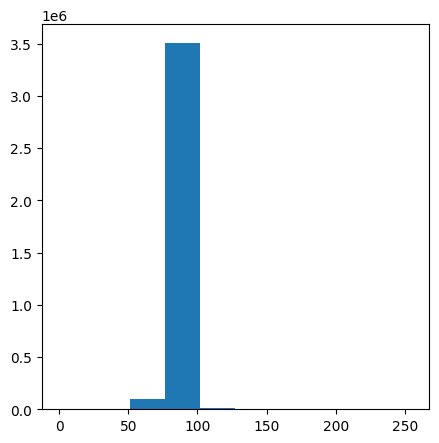

In [64]:
# plot saliency map histogram of values
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.hist(saliency_map.flatten(), bins=10)

In [73]:
# read original image in .nii.gz
import nibabel as nib
import numpy as np
import os
import itk
import matplotlib.pyplot as plt
from monai.config import print_config
from monai.transforms import (
    EnsureChannelFirst,
    Compose,
    LoadImage,  # Adjusted from LoadImaged for direct image loading
    Rotate90,
    Flip,
    NormalizeIntensity,
    ThresholdIntensity,
    SpatialPad,
    Resize,
    Transpose,
)
image_shape = 301
depth = 40
val_transforms = Compose([
    LoadImage(image_only=True, ensure_channel_first=True, reader="ITKReader"),
    Rotate90(k=3),
    Flip(spatial_axis=1),
    NormalizeIntensity(subtrahend=15, divisor=85),
    ThresholdIntensity(threshold=0, above=True, cval=0.0),
    ThresholdIntensity(threshold=1, above=False, cval=0.0),
    SpatialPad(spatial_size=[-1, -1, depth], mode='constant', method="symmetric"),
    Resize(spatial_size=[image_shape, image_shape, depth]),
    # Transpose(indices=[0, 3, 1, 2])  # Adjust based on actual shape after previous transforms
])
# choose patientID to review
patientID = 92
label_name="POOR_PROGNOSIS"
map_type = "guidedBackProp"
dir_saliency_map="/home/ubuntu/tenerife/data/ICH_results/3DClassificationImageModelMonai/Saliency_maps/MedCam/Fold0"
saliency_map_path=os.path.join(dir_saliency_map, f"{patientID}_{map_type}-label-{label_name}.nii.gz")
saliency_map_nii = nib.load(saliency_map_path)
print("Shape saliency map:", saliency_map_nii.shape)
dir_original_file=os.path.join("/home/ubuntu/tenerife/data/ICH_nii_StrippedSkull/", label_name)
original_file_path=os.path.join(dir_original_file, f'{patientID}_brain.nii.gz')
original_image_nii = itk.imread(original_file_path)
original_image = itk.GetArrayFromImage(original_image_nii)
print("Shape original image:", original_image_nii.shape)


# Convert NIfTI to numpy arrays
saliency_map = saliency_map_nii.get_fdata()
processed_image = val_transforms(original_file_path)
# squeeze processed image to 3D
processed_image = np.squeeze(processed_image)
print("Shape processed image:", processed_image.shape)

Shape saliency map: (301, 301, 40)
Shape original image: (28, 512, 512)
Shape processed image: (301, 301, 40)


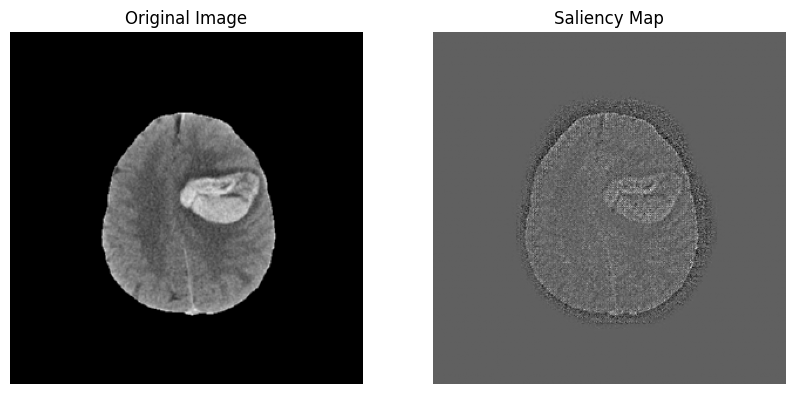

In [75]:
slice_index=24
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# If resizing is not used, replace 'saliency_map_resized' with 'saliency_map' in the next line
axes[0].imshow(processed_image[:, :, slice_index], cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(saliency_map[:, :, slice_index], cmap='gray')  # Use 'saliency_map_resized' if resized
axes[1].set_title('Saliency Map')
for ax in axes:
    ax.axis('off')
plt.show()

(-0.5, 300.5, 300.5, -0.5)

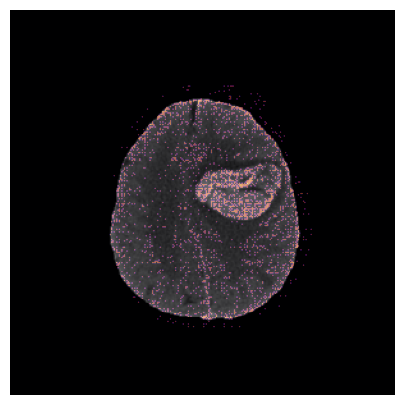

In [76]:
slice_index=24
# normalize saliency_map
saliency_map_normalized = (saliency_map - np.min(saliency_map)) / (np.max(saliency_map) - np.min(saliency_map))
# convert background of saliency_map to 0
saliency_map_normalized[saliency_map_normalized < 0.5] = 0
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(processed_image[:, :, slice_index], cmap='gray')
ax.imshow(saliency_map_normalized[:, :, slice_index], cmap='inferno', alpha=0.5)
ax.axis('off')


In [81]:
saliency_map[:, :, 18].max()

163.0